# Исследование для определения закономерности успешности игры 

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Цель исследования
Нам необходимо выявить, определяющие успешность игры, закономерности. Эти данные позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


### Ход исследования

- Получить данные из датафрейма games.csv, изучить их.
- При необходимости обработать данные, заполнить пропуски, если такие имеются и это возможно, изменить типы данных, устранить дубликаты, по возможности найти причины и избавиться от аномальных значений.
- Добавить новые столбцы в таблицу, необходимые для дальнейшего исследования.
- Провести исследовательский анализ данных о продаже игр.
- Определить актуальный период, на основе данных за который можно построить прогноз на 2017 год.
- Выделить топ-5 платформ, пользующихся наибольшей популярностью.
- Выяснить, как влияют на продажи отзывы пользователей и критиков. 
- Изучить распределение игр по жанрам и выявить есть ли жанры с высокими и низкими продажами
- Составить портрет для пользователя каждого региона (NA, EU, JP): 
  - популярные платформы;
  - популярные жанры;
  - влияет ли рейтинг ESRB на продажи в отдельном регионе
- Проверить гипотезы:
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Подвести общие итоги исследования.

### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Шаг 1. Открытие файла с данными и изучение общей информации

In [4]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from scipy import stats as st
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
# Считываем файл с данными и сохраняем в переменную data
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('C://work/games.csv')

In [6]:
#изучим первые 10 строк
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [7]:
#Получим детальную информацию о колонках DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
data.duplicated().sum()

0

In [9]:
#Получим статистическую характеристику данных 
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


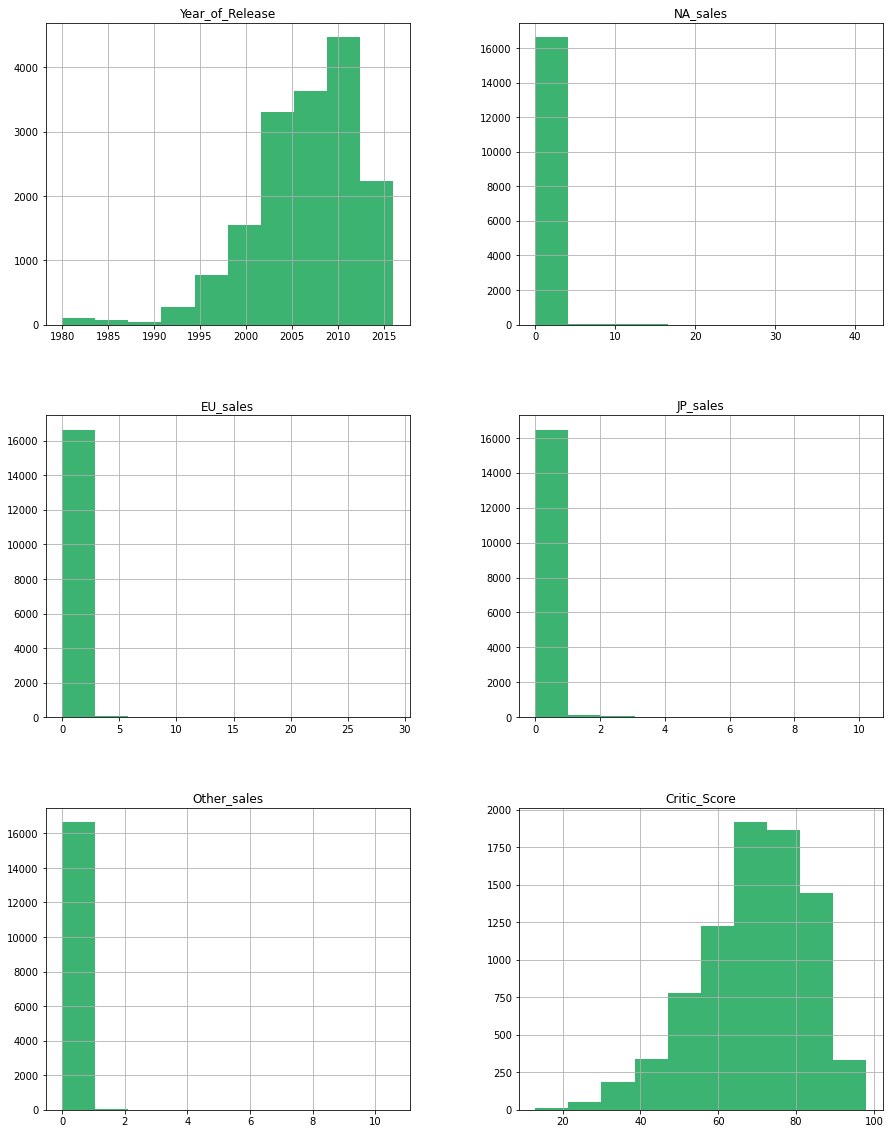

In [10]:
#общая гистограмма для всех числовых столбцов таблицы
data.hist(figsize=(15, 20), color = '#3CB371')
plt.show();

In [11]:
#Посмотрим какие столбцы у нас имеются
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

#### Вывод
- Названия стобцов необходимо перевести в нижний регистр, руководствуясь правилами хорошего тона
- В столбцах name, year_of_release, user_score, critic_score, rating, genre имеются пропуски, причины которых надо будет выяснить и решить, сможем ли мы заполнить эти пропуски или придется избавляться от этих данных
- Аномальных значений на первый вгляд нет
- Дубликатов нет


### Шаг 2. Подготовка данных

##### 1. Замените названия столбцов (приведите к нижнему регистру);

In [12]:
# Изменяем регистр с помощью метода str.lower()
data.columns = data.columns.str.lower()
# Проверяем внесенные изменения
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

##### 2. Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; 

In [13]:
#Получим детальную информацию о колонках DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Всего 16715 записей. У 
- Year_of_Release (float -> int), (так как год это целое число)
- User_Score (object -> float) (в описании данных сказано, что User_Score - оценка пользователей (максимум 10), так же это подтверждается изучением данных, потому здесь необходим числовой тип для дальнейших исследований)

некорректный тип данных. 

##### 3. Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

In [14]:
# Подсчитываем количество пропусков в столбцах
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [15]:
# Определяем пропуски в столбцах в % для наглядности
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('RdYlGn')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


<AxesSubplot:>

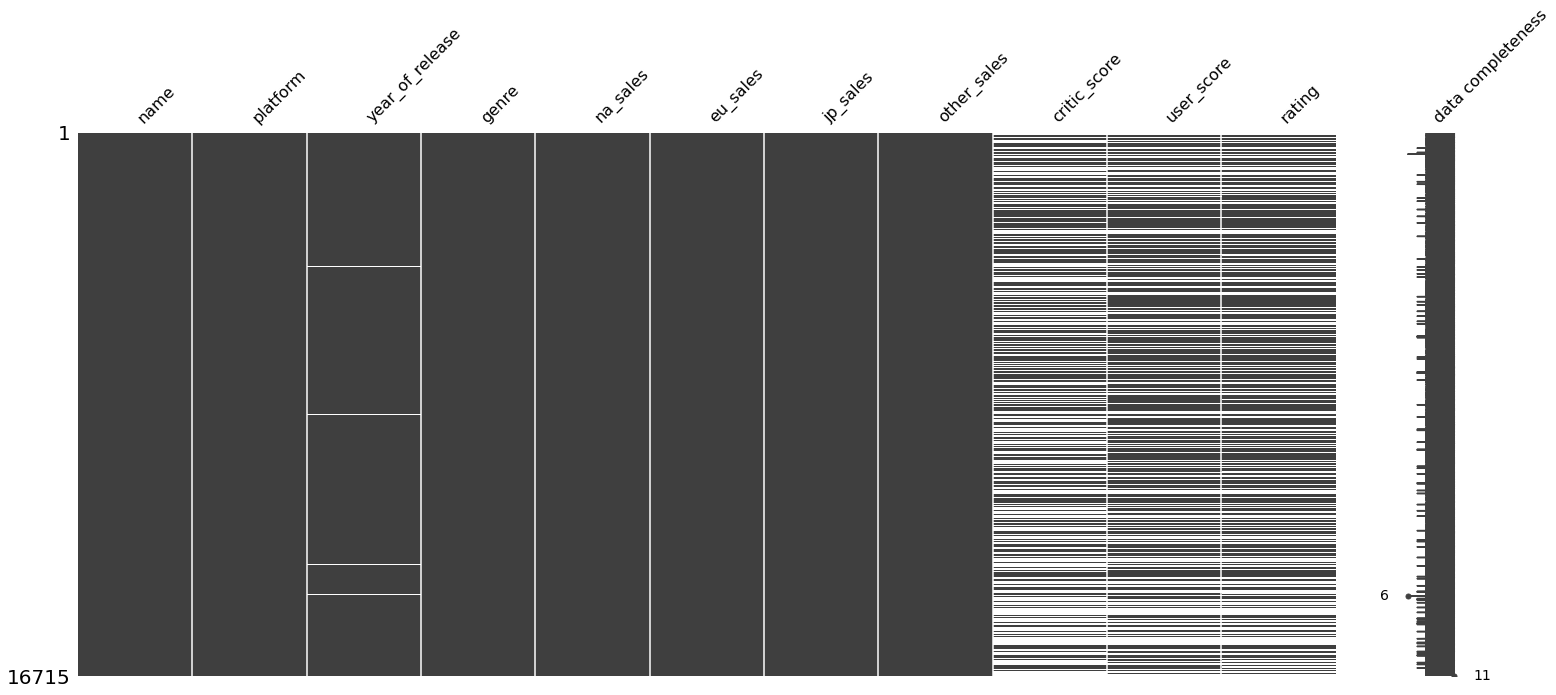

In [16]:
#Посмотрим на пропуски
msno.matrix(data, labels=True)

- **name** Пропуски в столбце name нельзя ничем заменить, потому лучшим решением будет удалить эти 2 игры. Возможно, их название по просту забыли указать, так как таких пропуска всего 2 или игра не имела официального названия, что встречается очень редко.
- **year_of_release** Пропуски в этом столбце также восстановить не получится, так что примем решение удалить эти строки. Пропуски могли возникнуть из-за того, что при заполнении данных об игре забыли указать или точная дата выхода игры не определена.
- **genre** Восстановить пропуск в этом столбце так же нельзя. Таких строки всего 2 так что, скорее всего их жанр просто забыли указать или создатели сами не определили к какому жанру относится их игра.
- **user_score, critic_score** Пропусков в столбцах critic_score, user_score очень много, 51% и 40% соответственно, поэтому избавиться от них не получится, так как потеряем слишком много данных. Заполним эти пропуски "заглушками", чтоб не искажать данные и не избавляться от них, главное не забыть учесть "заглушки" при исследовании этих данных. . Скорее всего у этих игр в принципе не было оценок, так как были не сильно популярны или вышли совсем недавно и еще не успели получить оценки.
- **rating** Здесь тоже очень много пропусков - 40%, заменить которые будет некорректно, а удаление приведет к искажению данных, так что тоже поставим "заглушки". Скорее всего организация ESRB просто не выставляла рейтинг этим играм в виду их непопулярности или позднего выхода.

In [17]:
# Удаляем записи с пропусками в столбцах name, year_of_release и genre
data = data.dropna(subset=['name'])
data = data.dropna(subset=['year_of_release'])
data = data.dropna(subset=['genre'])

In [18]:
#year_of_release меняем тип на int
data['year_of_release'] = data['year_of_release'].astype(int)

In [19]:
# Посмотрим уникальные значения в столбцах user_score, critic_score, rating, чтоб понять какие заглушки лучше поставить
print('critic_score = ', data['critic_score'].unique())
print('user_score = ', data['user_score'].unique())
print('rating = ', data['rating'].unique())

critic_score =  [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]
user_score =  ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
rating =  ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


* Видим, что в столбце **critic_score** только целые значения, так что после заполнения пропусков значением "-1", изменим тип на int


* В столбце **user_score** все значения числовые кроме значения "tbd", из-за чего весть столбец имеет тип object. Путём поиска в интернете находим, что рейтинг tbd(to be determined - "будет определено") - рейтинг, который будет определён позже. Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, именно это сокращение и используется. Поэтому можем считать этот рейтинг пропуском. Заменим все пропуски так же на "-1", и присвоем тип float.


* Столбец **rating** имеет тип object, так что в качестве заглушки присвоем "unknown"

In [20]:
#присваиваем пропускам в столбце critic_score -1 и меняем тип на int
data['critic_score'] = data['critic_score'].fillna(-1).astype(int)
#присваиваем пропускам и значению "tbd" в столбце user_score -1 и меняем тип на float
data['user_score'] = data['user_score'].replace('tbd', -1)
data['user_score'] = data['user_score'].fillna(-1).astype(float)
#присваиваем пропускам в столбце rating значение "unknown"
data['rating'] = data['rating'].fillna("unknown")

проверим ещё раз пропуски

In [21]:
data.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

- [x] **name** 
- [x] **year_of_release** 
- [x] **genre** 
- [x] **user_score** 
- [x] **critic_score** 
- [x] **rating**

**От пропусков избавились.**

Проверим сменили ли мы типы данных

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


- [x] year_of_release (float -> int), 
- [x] user_score (object -> float),
- [x] critic_score (float -> int),

**Типы данных корректны**

Посмотрим явные дубликаты

In [23]:
data.duplicated().sum()

0

**Явных дубликатов в данных нет**

In [24]:
# Посмотрим уникальные значения в оставшихся столбцах
print('genre: ')
data['genre'].value_counts()

genre: 


Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Посмотрим уникальные значения в оставшихся столбцах, чтоб выявить неянвые дубликаты

In [25]:
# Посмотрим уникальные значения в столбце genre
print('genre: ')
data['genre'].value_counts()

genre: 


Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Неявных дубликатов нет.

In [26]:
# Посмотрим уникальные значения в столбце platform
print('platform: ')
data['platform'].value_counts()

platform: 


PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

Неявных дубликатов нет.

In [27]:
# Посмотрим уникальные значения в столбце name
print('name: ')
data['name'].value_counts()

name: 


Need for Speed: Most Wanted                    12
FIFA 14                                         9
LEGO Marvel Super Heroes                        9
Ratatouille                                     9
Cars                                            8
                                               ..
Mega Man II                                     1
.hack//Outbreak Part 3                          1
Jissen Pachi-Slot Hisshouhou! Moujuu-Oh S       1
Spy Hunter: Nowhere To Run                      1
Now! That's What I Call Music: Dance & Sing     1
Name: name, Length: 11426, dtype: int64

Некоторые игры повторяются по многу раз, проверим количество платформ, если их больше 12, то всё хорошо, скорее всего игры просто были выпущены для разных платформ.

In [28]:
len(data['platform'].unique())

31

Платформ сильно больше, так что всё хорошо.

In [29]:
# Посмотрим уникальные значения в столбце rating
print('rating: ')
data['rating'].value_counts()

rating: 


unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

На официальном сайте ESRB нет рейтингов K-A, EC

"K-A" ("Kids to Adults") - первоначальное название рейтинга "E". Так что заменим "K-A" на "E". Скорее всего такие игры вышли еще до смены названия рейтинга, поэтому и остался рейтинг "K-A".

"EC" - утратил акутальность в 2018 году, изначально рейтинг для детей старше 3 лет. Сейчас такие игры имеют рейтинг "E". Но наши данные содержат информацию об играж до 2016 года включительно, так что заменять не будем.

In [30]:
#Заменяем значения "K-A" на "E"
data['rating'] = data['rating'].replace('K-A', 'E')

##### 4. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [31]:
# посчитаем суммарные продажи во всех регионах и запишем в столбец sum_sales
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.00,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.00,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.00,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.50,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.60,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.40,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.00,unknown,28.31


#### Вывод
Подготовила данных для последующего исследования.
- Изменила регистр в названии столбцов, т.к. формат разных регистров в наименовании столбцов считается некорректным.
- Выявила пропуски в столбцах 
    - **name** строки с пропусками удалила, т. к. заменить их каким то значением не получится. (2 строки)
    - **year_of_release** пропуски в этом столбце также восстановить не получится, так что приняла решение удалить эти строки. (269 строк)
    - **genre** восстановить пропуск в этом столбце так же нельзя, поэтому строки были удалены. (2 строки)
    - **user_score, critic_score** Пропусков в столбцах critic_score, user_score было очень много, 51% и 40% соответственно, поэтому было принято решение заменить пропуски на "заглушки" = -1.
    - **rating** здесь тоже было очень много пропусков - 40%, заменила на "заглушки" со значением "unknown", т. к. тип данных object.
- В столбце user_score имелось значение tbd, путём поиска в интернете, обнаружила, что такой рейтинг присуждается играм, еще не имеющим оценку, потому значение tbd было заменено на -1, как неизвестное.
- В столбце rating было два значения 'K-A' и 'E10+' - это два значения носящие один и тот же смысл,  ( "K-A" - устаревшее название для E10+), поэтому переименовала 'K-A' в 'E10+'.
- После избавления от пропусков занялась сменой типов данных:
    - year_of_release (float -> int), так как год целое число
    - user_score (object -> float), так как оценки имеют числовое значение
    - critic_score (float -> int), так как все оценки в столбце critic_score - целые числа.
- Добавила новый столбец sum_sales в датафрейм, сдержащий в себе суммарные продажи во всех регионах, этот столбец пригодится нам для дальнейшего исследования.

**Данных в датафрейме после предобработки : 16444 (было 16715)**


### Шаг 3. Исследовательский анализ данных

##### 1.Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [32]:
# Посчитаем сколько игр выпускалось в каждый год
count_games = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
count_games

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


In [33]:
#Загружаем палитру цветов
cmap = plt.get_cmap("Paired")
outer_colors = cmap(np.arange(12))

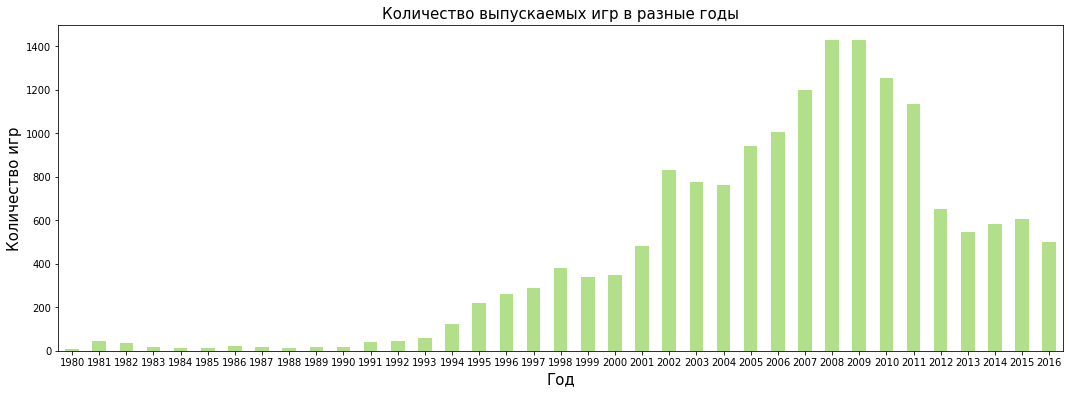

In [34]:
#Построим график для наглядности выпускаемых игр по годам
data.pivot_table(index='year_of_release', values='name', aggfunc='count').\
    reset_index().plot(x='year_of_release', kind = 'bar', figsize = (18,6),  fontsize = 10, legend=False, color = outer_colors[2])
plt.title('Количество выпускаемых игр в разные годы', fontsize = 15)
plt.xlabel('Год', fontsize = 15)
plt.xticks(rotation = 0)
plt.ylabel('Количество игр', fontsize = 15)
plt.show()

Данные до 2001 года так малы, что  учитывать их точно не имеет смысла. Наибольшее кол-во игр было выпущено в 2008-2009 годах. Заметно резкое снижение объема с начала 2009 года.

##### 2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [35]:
# Выбираем топ 5 платформ с наибольшими суммарными продажами
platform_sales = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).reset_index().head(5)
print(platform_sales)
platform_sales = platform_sales['platform']

  platform  sum_sales
0      PS2   1,233.56
1     X360     961.24
2      PS3     931.34
3      Wii     891.18
4       DS     802.78


Топ-5 платформ по продажам возглавляет PlayStation 2, затем идёт Xbox 360,  PlayStation 3, Nintendo Wii, Nintendo DS

Уже сейчас можем сделать вывод, что как минимум PlayStation 2 и последние 2 платформы на данный момент не актуальны. Построим график и посмотрим, как менялись продажи по платформам по годам. 

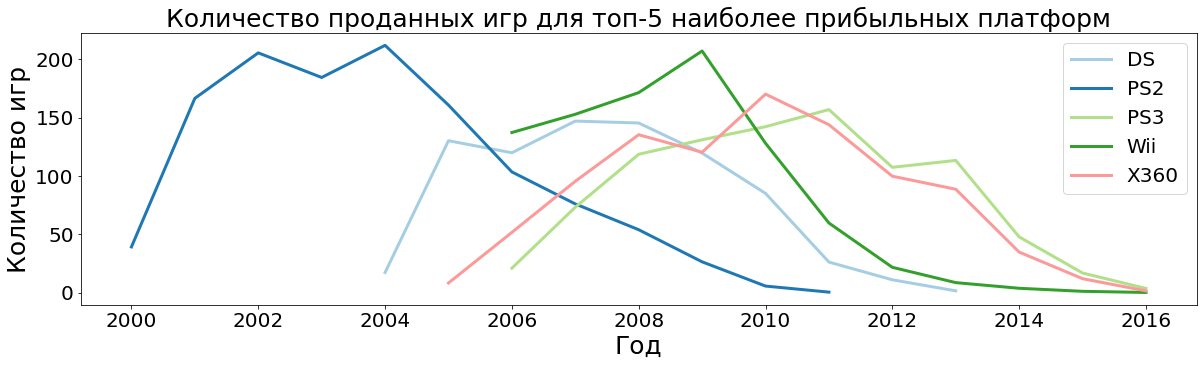

In [36]:
#Построим график и посмотрим, как менялись продажи по платформам по годам.
data.query('platform in @platform_sales and year_of_release > 1999').\
    pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum').\
    reset_index().plot(x='year_of_release', figsize = (20, 5), fontsize = 20, linewidth = 3, color = outer_colors)
plt.title('Количество проданных игр для топ-5 наиболее прибыльных платформ', fontsize = 25)
plt.legend(fontsize = 20)
plt.xlabel('Год', fontsize = 25)
plt.ylabel('Количество игр', fontsize = 25)
plt.show()

Платформы Nintendo DS и PlayStation 2 сейчас уже не пользуются спросом. В среднем платформы существуют по 10 лет.

##### 3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
##### Не учитывайте в работе данные за предыдущие годы.

Возьму в качестве актуального период 2014-2016гг., когда количество выпускаемых игр было примерно одинаковым, к тому же игры достаточно быстро устаревают, потому стоит взять именно небольшой промежуток, учитывая, что данные за 2016 неполные, то самым оптимальным считаю взять именно это период, чтоб были данные для дальнейшего исследования.

In [37]:
# Удаляем данные за неактуальный период
data = data.loc[data['year_of_release'] >= 2014]
# Сохраняю данные в ещё одну переменную, это пригодится в дальнейшем
data_all = data

**Данных в датафрейме после определения актуального периода : 1689 (было 16715)**

##### 3. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [38]:
# Посмотрим топ 5 платформ с наибольшими суммарными продажами в 2014-2016 гг.
platform_sales_act = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).reset_index().head(5)
print(platform_sales_act)
platform_sales_act = platform_sales_act['platform']

  platform  sum_sales
0      PS4     288.15
1     XOne     140.36
2      3DS      86.68
3      PS3      68.18
4     X360      48.22


Для дальнейшего ислледования оставим 5 самых прибыльных платформ

In [39]:
data = data.query('platform in @platform_sales_act')

**Данных в датафрейме после определения актуального периода и выделения топ-5 платформ : 1146 (было 16715)**

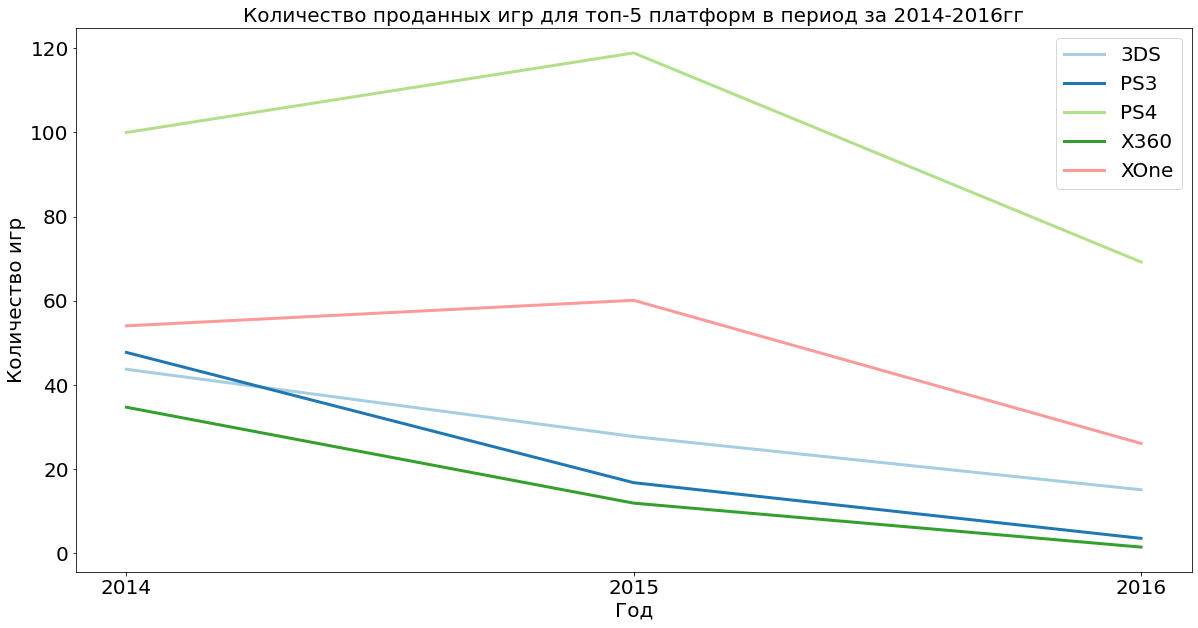

In [40]:
#Построим график, чтоб посмотреть как ведут себя платформы по годам
data.query('platform in @platform_sales_act').\
    pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum').\
    reset_index().plot(x='year_of_release', figsize = (20, 10), fontsize = 20, linewidth = 3, color = outer_colors)
plt.title('Количество проданных игр для топ-5 платформ в период за 2014-2016гг', fontsize = 20)
plt.legend(fontsize = 20)
plt.xlabel('Год', fontsize = 20)
plt.xticks(np.arange(2014,2017,1)),
plt.ylabel('Количество игр', fontsize = 20)
plt.show()

В период с 2014 по 2015 продажи игр на платформах PS4 и XOne росли, что видно по графику, данные за 2016 год неполные, потому не можем явно сказать, что продажи упали, скорее всего они продолжат свой рост.
Продажи на других платформах в это же время падали.

##### 4. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [41]:
#сгруппируем данные по платформам и смотрим описания столбца с суммарными продажами
data.groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.00,0.41,1.19,0.01,0.03,0.09,0.25,11.68
PS3,219.00,0.31,0.63,0.01,0.04,0.11,0.33,5.27
PS4,376.00,0.77,1.61,0.01,0.06,0.18,0.69,14.63
X360,111.00,0.43,0.63,0.01,0.07,0.18,0.51,4.28
XOne,228.00,0.62,1.05,0.01,0.05,0.20,0.63,7.39


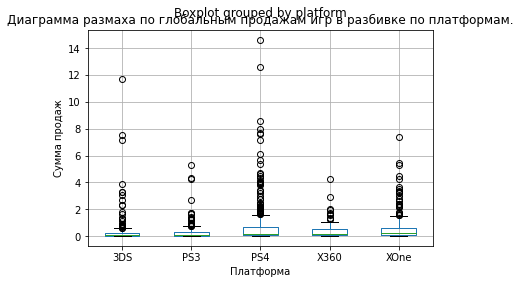

In [42]:
#построим общую диаграмму размаха
data.boxplot(column='sum_sales', by='platform')
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам.')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

Просмотрев общую диаграмму размаха мы увидели частые выбросы и редкие. Такие выбросы могут быть из-за очень популярных игр.

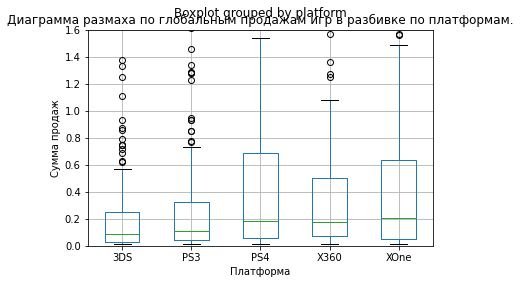

In [43]:
#построим общую диаграмму размаха
data.boxplot(column='sum_sales', by='platform')
plt.ylim([0,1.6])
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам.')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

Приблизив график, можем подробней рассмотреть медианы: у всех протекает по разному:
- Больше всех продаж у PS4, затем XOne, после X360, PS3, 3DS, что подтверждается 75% квантилями.

##### 5. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [44]:
#Выделим данные только для PS4
data_ps4 = data.loc[data['platform'] == 'PS4']
#Не забываем, что поставили заглушки в user_score и critic_score


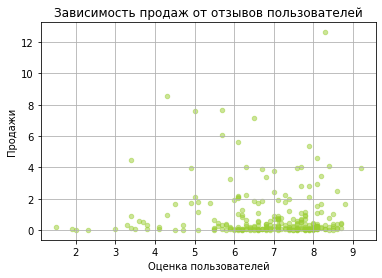

Коэффицент корреляции =  -0.040131589472697356


In [45]:
#Зависимость продаж от отзывов критики
#Не забываем, что поставили заглушки в user_score
data_ps4.loc[data['user_score'] != -1].plot(x='user_score', y='sum_sales', kind='scatter', grid=True, color='yellowgreen', alpha=0.5) 
plt.title('Зависимость продаж от отзывов пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()
print('Коэффицент корреляции = ', data_ps4.loc[data['user_score'] != -1]['sum_sales'].corr(data_ps4.loc[data['user_score'] != -1]['user_score']))

Корреляция слабо отрицательная: -0.04. 

*Чем ближе коэффициент корреляции Пирсона к крайним значениям 1 или -1, тем теснее линейная взаимосвязь. Если значение близко к нулю, значит, линейная связь слабая либо отсутствует вовсе.*

Потому можем сказать, что зависимости между продажами и оценками пользователей нет.

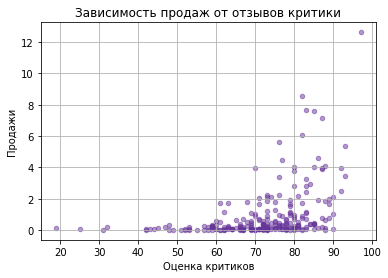

Коэффицент корреляции =  0.40266141068104083


In [46]:
#Зависимость продаж от отзывов критики
data_ps4.loc[data['critic_score'] != -1].plot(x='critic_score', y='sum_sales', kind='scatter', grid=True, color='#663399', alpha=0.5) 
plt.title('Зависимость продаж от отзывов критики')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()
print('Коэффицент корреляции = ', data_ps4.loc[data['critic_score'] != -1]['critic_score'].corr(data_ps4.loc[data['critic_score'] != -1]['sum_sales']))

Корреляция слабо положительная: 0.4

Корреляция в 0.4 говорит о наличии связи, но довольно слабой.

##### 6. Соотнесите выводы с продажами игр на других платформах.

Посмотрим, как влияют на продажи отзывы пользователей и критиков на других платформах.

In [71]:
data['sum_sales']

31      14.63
42      12.62
47      11.68
77       8.58
87       7.98
         ... 
16672    0.01
16674    0.01
16677    0.01
16691    0.01
16710    0.01
Name: sum_sales, Length: 1146, dtype: float64

Платформа:  3DS
Коэффицент корреляции  между продажами и оценкой критиков =  0.314117492869051
Коэффицент корреляции  между продажами и оценкой пользователей =  0.2151932718527028


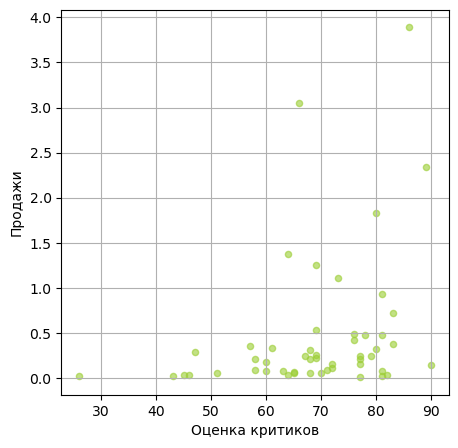

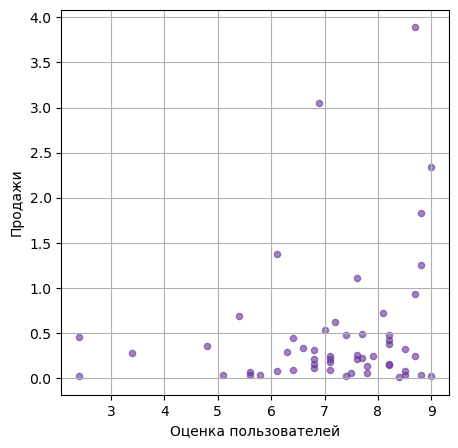

Платформа:  PS3
Коэффицент корреляции  между продажами и оценкой критиков =  0.44657460493190704
Коэффицент корреляции  между продажами и оценкой пользователей =  -0.16676141347662118


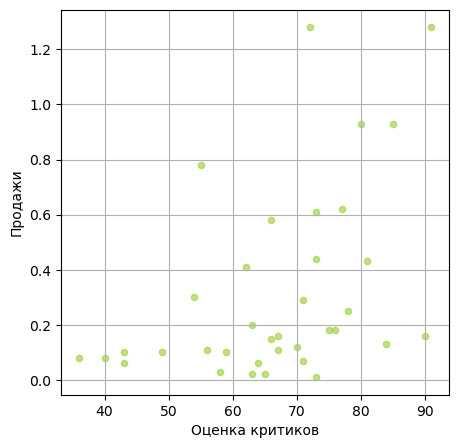

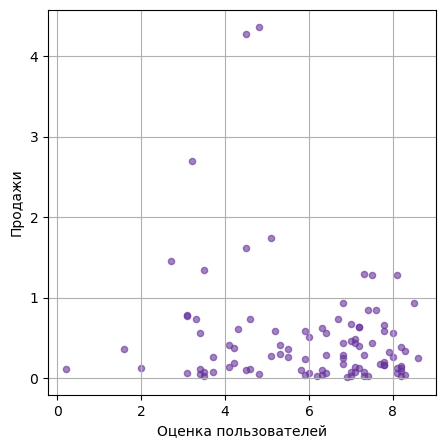

Платформа:  PS4
Коэффицент корреляции  между продажами и оценкой критиков =  0.40266141068104083
Коэффицент корреляции  между продажами и оценкой пользователей =  -0.040131589472697356


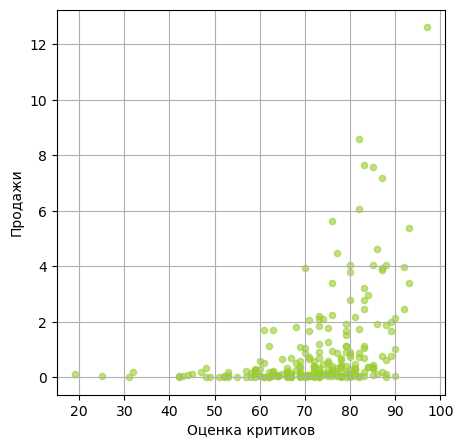

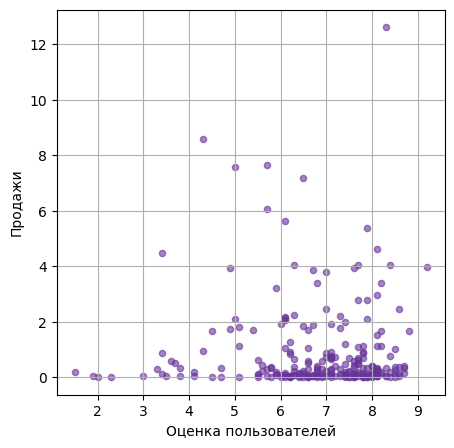

Платформа:  X360
Коэффицент корреляции  между продажами и оценкой критиков =  0.5257228356581523
Коэффицент корреляции  между продажами и оценкой пользователей =  -0.138444570945665


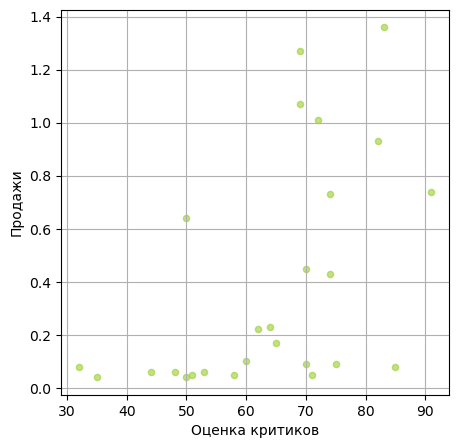

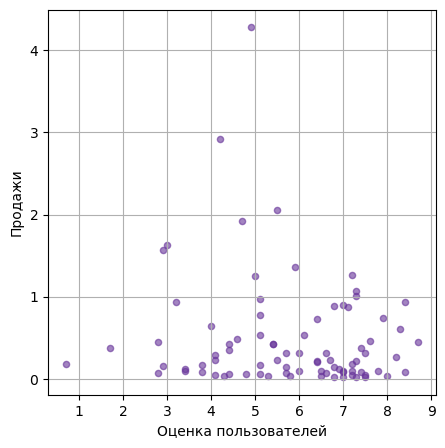

Платформа:  XOne
Коэффицент корреляции  между продажами и оценкой критиков =  0.42867694370333226
Коэффицент корреляции  между продажами и оценкой пользователей =  -0.0703839280647581


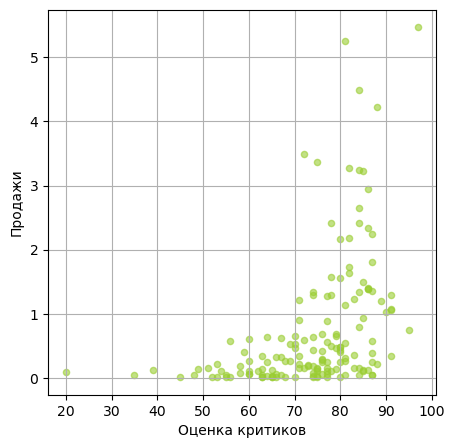

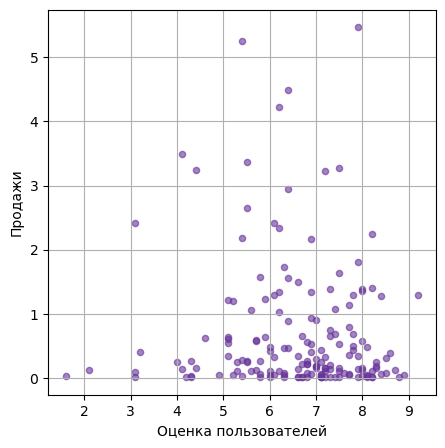

In [44]:
#Для автоматизации построения графиков и расчёта корреляций напишем цикл, 
#который будет строить необходимые графики для всех платформ из топ-5
for platform, datas in data.groupby('platform'):
    print('Платформа: ', platform)
    print('Коэффицент корреляции  между продажами и оценкой критиков = ', datas.loc[datas['critic_score'] != -1]['critic_score'].corr(datas.loc[datas['critic_score'] != -1]['sum_sales']))
    print('Коэффицент корреляции  между продажами и оценкой пользователей = ', datas.loc[datas['user_score'] != -1]['user_score'].corr(datas.loc[datas['user_score'] != -1]['sum_sales']))
    datas.loc[data['critic_score'] != -1].plot(kind='scatter', x='critic_score', y='sum_sales', 
                                              grid=True, color='yellowgreen', alpha=0.6, figsize=(5,5),
                                              xlabel='Оценка критиков', ylabel='Продажи')
    datas.loc[data['user_score'] != -1].plot(kind='scatter', x='user_score', y='sum_sales', 
                                            grid=True, color='#663399', alpha=0.6, figsize=(5,5),
                                            xlabel='Оценка пользователей', ylabel='Продажи')
    plt.show()

Корреляция между продажами и оценками пользователями на всех платформах минимальная, из чего делаем вид, что зависимости между этими двумя величинами нет.

Корреляция между продажами и оценками критиков в среднем равна 0.45, из чего делаем вид, что зависимость хоть и есть, но она совсем не велика.

Это говорит о том, что покупатели прислушиваются больше к критикам, нежели к оценкам других пользователей.

##### 7. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [45]:
# Посчитаем сколько игр выпускалось в каждом жанре с 2014-2016 год на топ-5 прибыльных платформы
count_genre = data.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False).reset_index()
count_genre

,genre,name
0,Action,422
1,Role-Playing,140
2,Sports,136
3,Shooter,103
4,Adventure,95
5,Misc,75
6,Racing,52
7,Fighting,49
8,Platform,26
9,Simulation,23


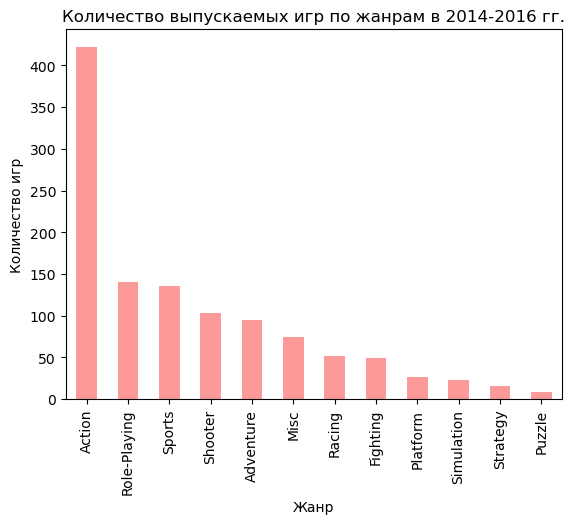

In [46]:
#Построим график распредления выпускаемых игр по жанрам
count_genre.plot(kind='bar', x = 'genre', color=outer_colors[4], legend = False)
plt.title('Количество выпускаемых игр по жанрам в 2014-2016 гг.')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.show()

По количеству выпускаемых игр самый популярный жанр в 2014-2016 гг. - Action.

Самый непопулярный жанр - Puzzle.

Для поиска самого прибыльного жанра возьмём средние и медианные продажи.

In [47]:
# Посмотрим самые прибыльные жанры по игр в 2014-2016 гг.
mean_sum_genre = data.pivot_table(index='genre', values='sum_sales', aggfunc='mean').sort_values(by='sum_sales', ascending=False).reset_index()
mean_sum_genre

,genre,sum_sales
0,Shooter,1.55
1,Sports,0.78
2,Role-Playing,0.64
3,Fighting,0.44
4,Platform,0.42
5,Action,0.42
6,Racing,0.38
7,Misc,0.35
8,Simulation,0.28
9,Adventure,0.15


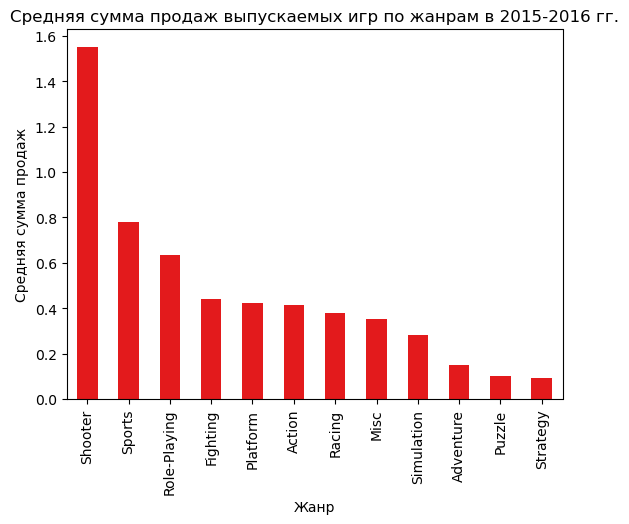

In [48]:
mean_sum_genre.plot(kind='bar', x = 'genre', color=outer_colors[5], legend = False)
plt.title('Средняя сумма продаж выпускаемых игр по жанрам в 2015-2016 гг.')
plt.xlabel('Жанр')
plt.ylabel('Средняя сумма продаж')
plt.show()

In [49]:
# Посмотрим самые прибыльные жанры игр в 2014-2016 гг.
median_sum_genre = data.pivot_table(index='genre', values='sum_sales', aggfunc='median').sort_values(by='sum_sales', ascending=False).reset_index()
median_sum_genre

,genre,sum_sales
0,Shooter,0.68
1,Sports,0.28
2,Role-Playing,0.17
3,Platform,0.14
4,Fighting,0.13
5,Racing,0.12
6,Simulation,0.12
7,Action,0.11
8,Misc,0.11
9,Adventure,0.06


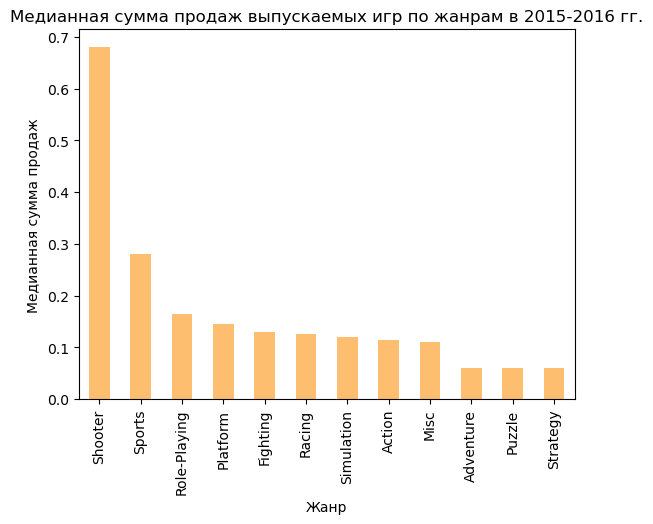

In [50]:
median_sum_genre.plot(kind='bar', x = 'genre', color=outer_colors[6], legend = False)
plt.title('Медианная сумма продаж выпускаемых игр по жанрам в 2015-2016 гг.')
plt.xlabel('Жанр')
plt.ylabel('Медианная сумма продаж')
plt.show()

По продажам самый популярный жанр в 2014-2016 гг. - Shooter.

Самые непопулярные жанры - Puzzle и Strategy.

#### Вывод
- Определила актуальный период для дальнейшего исследования - 2014-2016 гг.
- Определила среднюю продолжительность существования платформ - 10 лет.
- Выявила топ-5 платформ с наибольшими продажами за последние годы: PlayStation 4, Xbox One, Nintendo 3DS, PlayStation 3, Xbox 360
- Проанализировала зависимость продаж от оценок критиков и пользователей, выяснила, что:
    - зависимости между продажами и оценками пользователей нет
    - есть небольшая зависимость между продажами и оценками критиков
- Посмотрела на общее распределение игр по жанрам:
    - самым прибыльным жанром является: Shooter
    - самые непопулярные жанры - Puzzle и Strategy.


### Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [51]:
regions_sales = ['na_sales', 'eu_sales', 'jp_sales']

In [52]:
# Построимм pivot_table с суммарными продажами по платформам для каждого региона (NA, EU, JP).
data_regions_platform = data_all.pivot_table(index='platform', values=regions_sales, aggfunc='sum')
data_regions_platform

,eu_sales,jp_sales,na_sales
platform,,,
3DS,16.12,44.24,22.64
PC,17.97,0.00,7.23
PS3,25.54,11.22,22.05
PS4,130.04,15.02,98.61
PSP,0.00,0.36,0.00
PSV,3.53,14.54,2.52
Wii,2.59,0.00,2.08
WiiU,13.15,7.31,19.36
X360,15.49,0.08,28.30


In [53]:
#Выделим топ-5 для Северной Америки
data_regions_platform.sort_values(by='na_sales', ascending=False).head(5)['na_sales']

platform
PS4    98.61
XOne   81.27
X360   28.30
3DS    22.64
PS3    22.05
Name: na_sales, dtype: float64

In [54]:
#Выделим топ-5 для Европы
data_regions_platform.sort_values(by='eu_sales', ascending=False).head(5)['eu_sales']

platform
PS4    130.04
XOne    46.25
PS3     25.54
PC      17.97
3DS     16.12
Name: eu_sales, dtype: float64

In [55]:
#Выделим топ-5 для Японии
data_regions_platform.sort_values(by='jp_sales', ascending=False).head(5)['jp_sales']

platform
3DS    44.24
PS4    15.02
PSV    14.54
PS3    11.22
WiiU    7.31
Name: jp_sales, dtype: float64

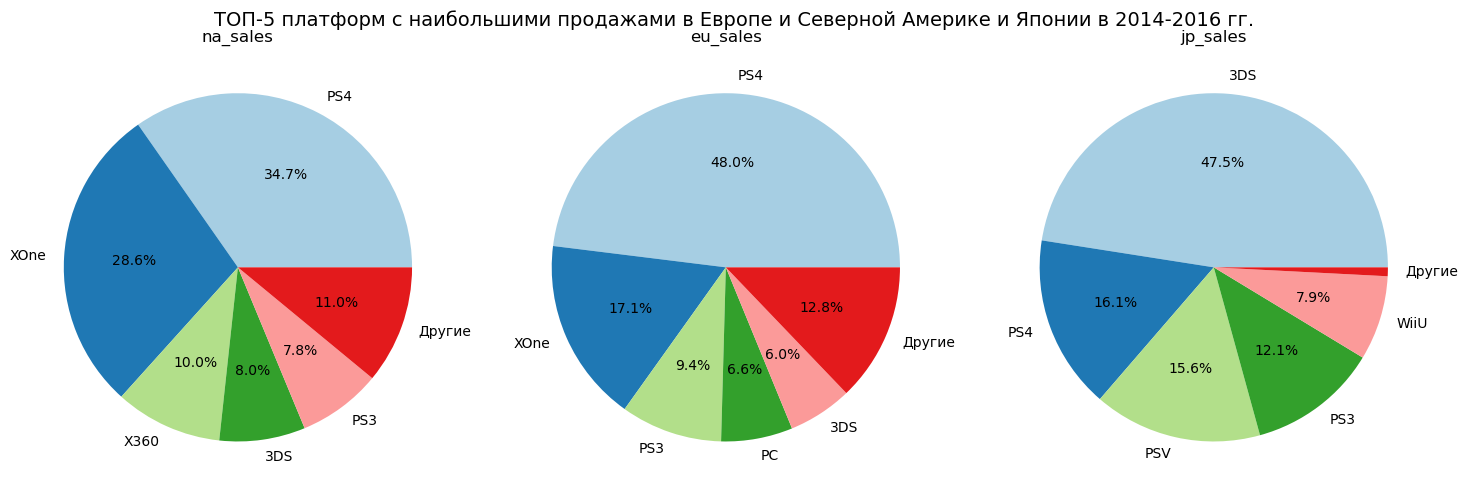

In [56]:
#Построим круговые диаграммы для наглядности просмотра топ-5 платформ
fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
for i, region in enumerate(regions_sales):
    region_platform = data_all.groupby('platform').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
    region_platform.loc[5] = ['Другие', region_platform.loc[5:][region].sum().round(2)]
    region_top_platform = region_platform.head(6)        
    ax[i].pie(region_top_platform[region], labels=region_top_platform['platform'], colors=outer_colors, autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(region)
plt.suptitle('ТОП-5 платформ с наибольшими продажами в Европе и Северной Америке и Японии в 2014-2016 гг.', fontsize=14)
plt.tight_layout()
plt.show()

Самой популярной игровой платформой в Северной Америке и Европе является PlayStation 4, а в Японии Nintendo 3DS, так как она производится в Японии, очевидно, что она там самая популярная.
Платформы Windows, которые входят в топ-5 в Северной Америке и Европе, отсутсвуют в топе-5 платформ Японии, что обусловлено, тем, что эти платформы в Японии  вышли на год позже, возможно, они еще не успели набрать популярность.

In [57]:
# Построимм pivot_table с суммарными продажами по жанрам для каждого региона (NA, EU, JP).
data_regions_genre = data_all.pivot_table(index='genre', values=regions_sales, aggfunc='sum')
data_regions_genre

,eu_sales,jp_sales,na_sales
genre,,,
Action,74.68,29.58,72.53
Adventure,6.49,3.60,5.64
Fighting,6.69,6.37,12.43
Misc,12.86,5.61,15.05
Platform,6.80,2.69,6.79
Puzzle,0.52,0.93,0.65
Racing,14.13,1.76,8.74
Role-Playing,28.17,31.16,33.47
Shooter,65.52,4.87,79.02


In [58]:
#Выделим топ-5 для Северной Америки
data_regions_genre.sort_values(by='eu_sales', ascending=False).head(5)['eu_sales']

genre
Action         74.68
Shooter        65.52
Sports         45.73
Role-Playing   28.17
Racing         14.13
Name: eu_sales, dtype: float64

In [59]:
#Выделим топ-5 для Европы
data_regions_genre.sort_values(by='na_sales', ascending=False).head(5)['na_sales']

genre
Shooter        79.02
Action         72.53
Sports         46.13
Role-Playing   33.47
Misc           15.05
Name: na_sales, dtype: float64

In [60]:
#Выделим топ-5 для Японии
data_regions_genre.sort_values(by='jp_sales', ascending=False).head(5)['jp_sales']

genre
Role-Playing   31.16
Action         29.58
Fighting        6.37
Misc            5.61
Shooter         4.87
Name: jp_sales, dtype: float64

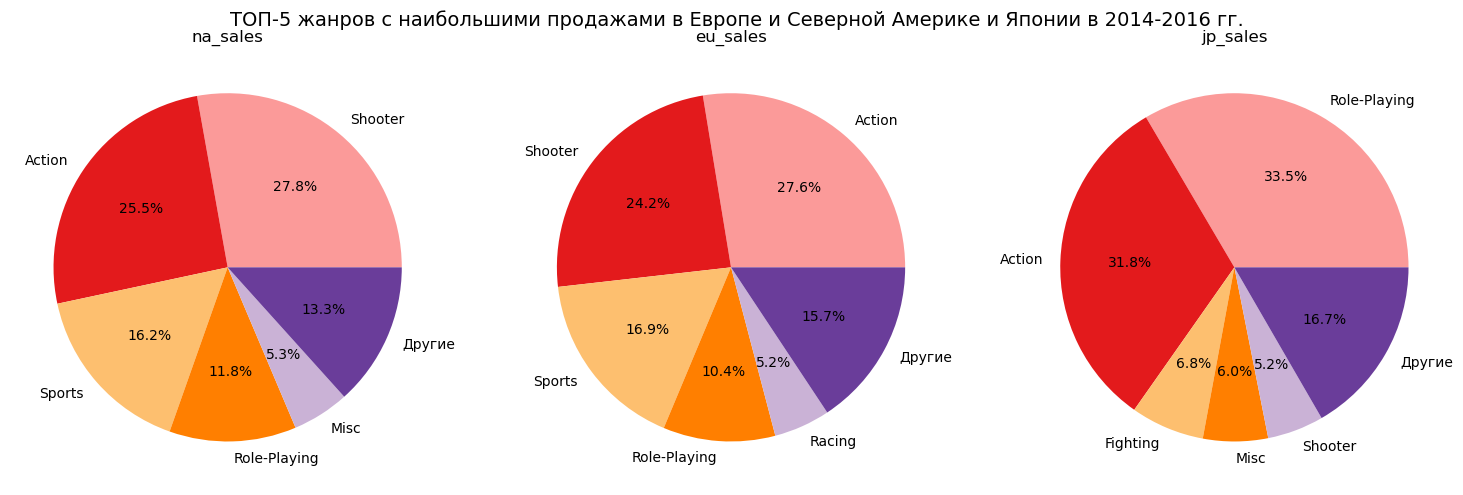

In [61]:
#Построим круговые диаграммы для наглядности просмотра топ-5 жанров
fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
cmap = plt.get_cmap("Paired")
outer_colors_2 = cmap(np.arange(4,11))
for i, region in enumerate(regions_sales):
    region_platform = data_all.groupby('genre').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
    region_platform.loc[5] = ['Другие', region_platform.loc[5:][region].sum().round(2)]
    region_top_platform = region_platform.head(6)        
    ax[i].pie(region_top_platform[region], labels=region_top_platform['genre'], colors=outer_colors_2, autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(region)
plt.suptitle('ТОП-5 жанров с наибольшими продажами в Европе и Северной Америке и Японии в 2014-2016 гг.', fontsize=14)
plt.tight_layout()
plt.show()

Самым популярным жанром во всех трех регионах является жанр Action, хотя в Японии он на втором месте, на первом - Role-Playing.

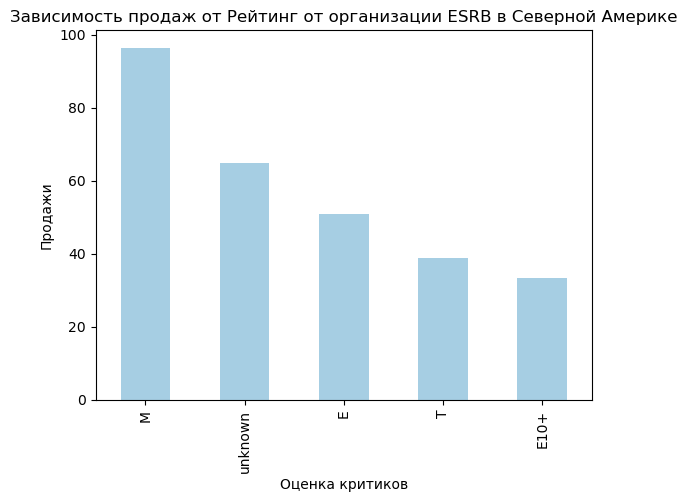

In [62]:
#Зависимость продаж от отзывов критики
rating_na = data_all.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_eu = data_all.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_jp = data_all.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
rating_na.plot(x='rating', y='na_sales', kind='bar', color=outer_colors[0],
               title='Зависимость продаж от Рейтинг от организации ESRB в Северной Америке',
               xlabel = 'Оценка критиков', ylabel='Продажи')
plt.show()


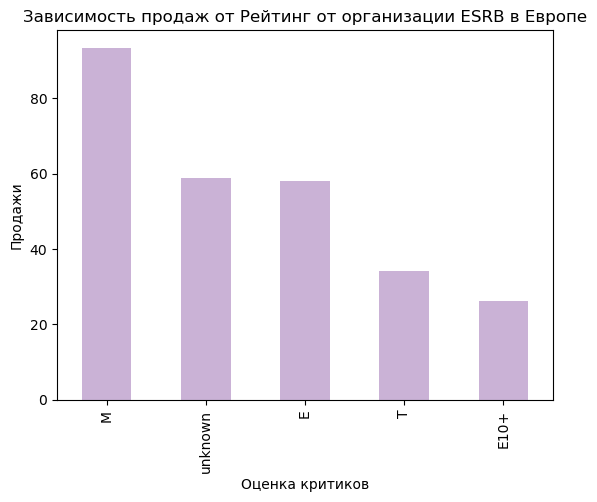

In [63]:
rating_eu.plot(x='rating', y='eu_sales', kind='bar', color=outer_colors[8],
               title='Зависимость продаж от Рейтинг от организации ESRB в Европе',
               xlabel='Оценка критиков', ylabel='Продажи')
plt.show()

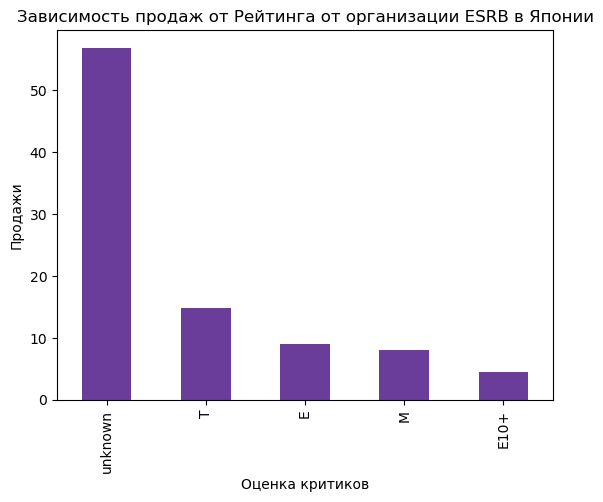

In [64]:
rating_jp.plot(x='rating', y='jp_sales', kind='bar', color=outer_colors[9],
               title='Зависимость продаж от Рейтинга от организации ESRB в Японии',
               xlabel='Оценка критиков', ylabel='Продажи')
plt.show()

В Северной Америке и Европе популярны игры для взрослых (17+)
В Японии игры для подростков (13+) и для всех возрастов

#### Вывод
##### Портрет пользователя для Северной Америки и Европы
- Чаще играют на платформах PlayStation 4 и XBoxOne 
- Популярные жанры Action и Shooter
- Наиболее популярны игры для взрослых

##### Портрет пользователя для Японии
- Чаще играют на платформе отечественного производства Nintendo 3DS
- Популярные жанры Role-Playing и Action
- Наиболее популярны игры для подростков и всех возрастов.


### Шаг 5. Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H₁: Средние пользовательские рейтинги платформ Xbox One и PC неодинаковые;

In [65]:
user_score_xone = data_all.loc[(data_all['platform'] == 'XOne') & (data_all['user_score'] != -1)]['user_score']
user_score_pc = data_all.loc[(data_all['platform'] == 'PC') & (data_all['user_score'] != -1)]['user_score']

alpha =.05
results = st.ttest_ind(
    user_score_xone, 
    user_score_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


H₀: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

H₁: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [66]:
user_score_action = data_all.loc[(data_all['genre'] == 'Action') & (data_all['user_score'] != -1)]['user_score']
user_score_sports = data_all.loc[(data_all['genre'] == 'Sports') & (data_all['user_score'] != -1)]['user_score']

alpha =.05
results = st.ttest_ind(
    user_score_action, 
    user_score_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Оставляем альтернативную гипотезу H₁: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### Вывод
- Мы не смогли опровергнуть гипотезу, о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, потому можем говорить о том, что такое может быть
- Мы опровергнули гипотезу, о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые, соответственно можем говорить, о том, что они разные

### Шаг 6. Напишите общий вывод

- Получила данные из датафрейма games.csv, изучила их.
- Обработала данные, заполнила пропуски, где это возможно, изменила типы данных.
- Добавила новый столбец в таблицу, содержащую суммарные продажи по всему миру, необходимые для дальнейшего исследования.
- Провела исследовательский анализ данных о продаже игр.
- Определила актуальный период, на основе данных за который можно построить прогноз на 2017 год: 2014-2016 гг.
- Выделила топ-5 платформ, пользующихся наибольшей популярностью: PlayStation 2, затем идёт Xbox 360, PlayStation 3, Nintendo Wii, Nintendo DS.
- Выяснила, как влияют на продажи отзывы пользователей и критиков:
    - зависимости между продажами и оценками пользователей нет
    - есть небольшая зависимость между продажами и оценками критиков
- Изучить распределение игр по жанрам и выявить есть ли жанры с высокими и низкими продажамиЖ
    - самыми прибыльными жанрами являются: Action и Shooter
    - самые непопулярные жанры - Puzzle и Strategy.
- Составить портрет для пользователя каждого региона (NA, EU, JP):
    - *Портрет пользователя для Северной Америки и Европы*
        - Чаще играют на платформах PlayStation 4 и XBoxOne 
        - Популярные жанры Action и Shooter
        - Наиболее популярны игры для взрослых
    - *Портрет пользователя для Японии*
        - Чаще играют на платформе отечественного производства Nintendo 3DS
        - Популярные жанры Role-Playing и Action
        - Наиболее популярны игры для подростков и всех возрастов.
- Проверила гипотезы:
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (не отвергнута);
  - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные (не отвергнута).



Наиболее успешной будет игра, выпущенная на платформе PlayStation 4, в жанре Shooter, с рейтингом M.